In [1]:
library(ggplot2)
library(knitr)

### Exercise 1: Bayesian Inference for Poisson model

The number of particles emitted by a radioactive source during a fixed interval of time  
($\Delta t = 10\ s$) follows a Poisson distribution on the parameter $\mu$. The number of particles  
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.

a) assuming a positive uniform priori distributiuon for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data

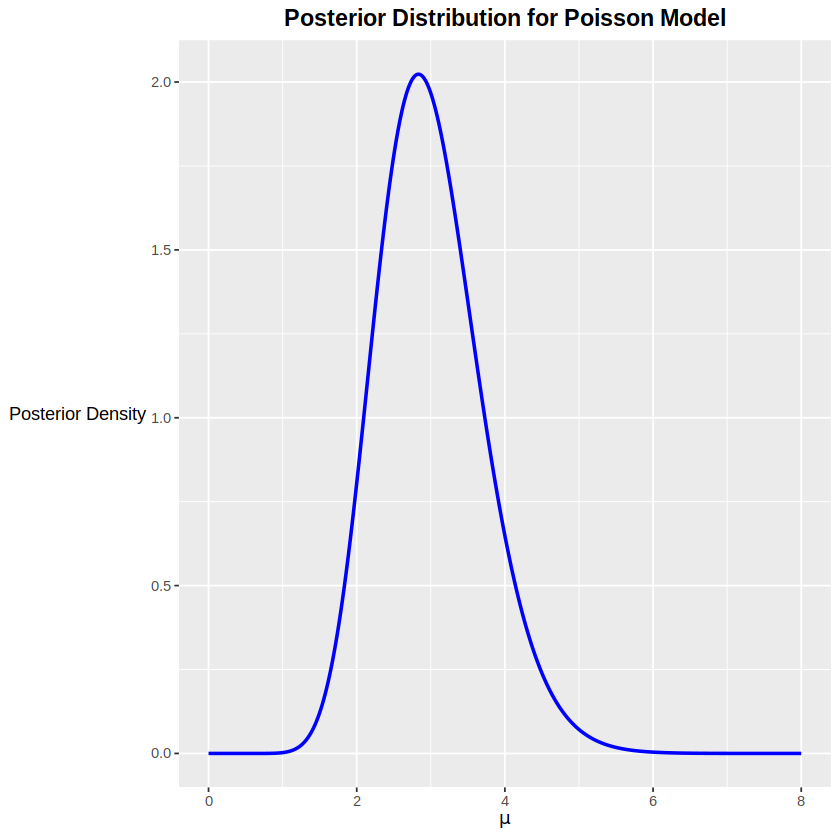

In [2]:
data = c(4,1,3,1,5,3)
counts = length(data)
total = sum(data)

post_density = function(mu) {
    likel = exp((-counts)*mu) * (mu^total)
    return(likel)
}

mu = seq(0,8,length.out=1000)
post_values = sapply(mu, post_density)
norm_post_values = post_values/sum(post_values)
post_data = data.frame(mu=mu, post_values=post_values)

ggplot(post_data, aes(x=mu, y=post_values)) + 
    geom_line(color='blue', linewidth=1) +
    labs(x=expression(mu),
         y='Posterior Density', 
         title='Posterior Distribution for Poisson Model') + 
    theme(axis.title.y=element_text(angle=0, vjust=0.5),
            plot.title=element_text(hjust=0.5, size=14, face="bold"))

- evaluate mean, median and variance, both analytically and numerically in R

In [7]:
#for a Poisson distribution, the posterior distribution is a Gamma distribution, so i'll use this info to calculate mean and variace
cdf_values = cumsum(norm_post_values)

anal_mean = (total+1)/counts
anal_median = mu[which.max(norm_post_values)]
anal_var = (total+1)/(counts^2)

num_mean = sum(mu * norm_post_values)
num_median = mu[which(cdf_values >= 0.5)[1]]
num_var = sum((mu - num_mean)^2 * norm_post_values)

results_df = data.frame(
  Type = c("Analytical", "Numerical"),
  Mean = c(anal_mean, num_mean),
  Median = c(anal_median, num_median),
  Variance = c(anal_var, num_var)
)

kable(results_df, caption="Analytical and Numerical Results")



Table: Analytical and Numerical Results

|Type       |     Mean|   Median|  Variance|
|:----------|--------:|--------:|---------:|
|Analytical | 3.000000| 2.834835| 0.5000000|
|Numerical  | 2.999999| 2.946947| 0.4999938|

b) assuming a Gamma prior such that the expected value is $\mu = 3$ with a standard deviation $\sigma = 1$

- determine and draw the posterior distribution for $\mu$, given the data

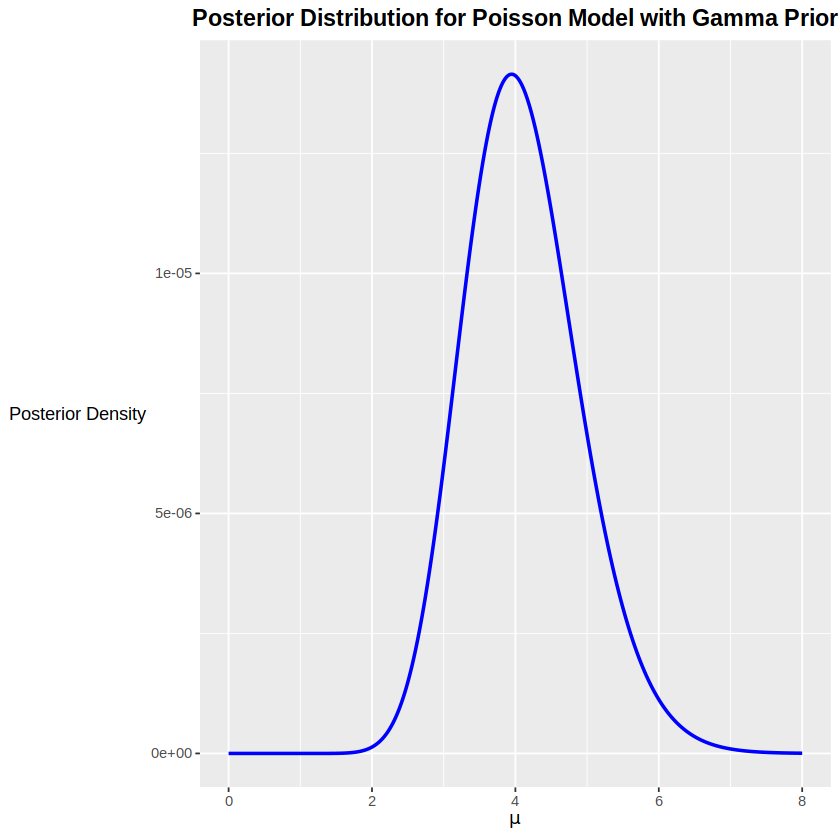

In [4]:
expected_mu = 3
sigma = 1

beta = (sigma)^2 / expected_mu
alpha = expected_mu / beta

post_density_gamma = function(mu, alpha, beta) {
    likel = exp((-counts) * mu) * (mu^total)
    prior = dgamma(mu, shape=alpha, rate=beta)
    posterior = likel * prior
    return(posterior)
}

post_values_gamma = post_density_gamma(mu, alpha, beta)
norm_post_values_gamma = post_values_gamma / sum(post_values_gamma)
post_data_gamma = data.frame(mu=mu, post_values_gamma=post_values_gamma)

ggplot(post_data_gamma, aes(x=mu, y=post_values_gamma)) + 
    geom_line(color='blue', linewidth=1) + 
    labs(x=expression(mu),
         y='Posterior Density', 
         title='Posterior Distribution for Poisson Model with Gamma Prior') + 
    theme(axis.title.y = element_text(angle = 0, vjust = 0.5), 
          plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

- evaluate mean, median and variance, both analytically and numerically in R

In [9]:
anal_mean_gamma = alpha / beta
anal_median_gamma = (alpha - 1) / beta
anal_var_gamma = alpha / (beta^2)

num_mean_gamma = sum(mu * norm_post_values_gamma)
num_median_gamma = mu[which(cumsum(norm_post_values_gamma) >= 0.5)[1]]
num_var_gamma = sum((mu - num_mean_gamma)^2 * norm_post_values_gamma)

results_df_gamma = data.frame(
  Type = c("Analytical", "Numerical"),
  Mean = c(anal_mean_gamma, num_mean_gamma),
  Median = c(anal_median_gamma, num_median_gamma),
  Variance = c(anal_var_gamma, num_var_gamma)
)

kable(results_df_gamma, caption = "Analytical and Numerical Results with Gamma Prior")



Table: Analytical and Numerical Results with Gamma Prior

|Type       |      Mean|    Median|   Variance|
|:----------|---------:|---------:|----------:|
|Analytical | 27.000000| 24.000000| 81.0000000|
|Numerical  |  4.105054|  4.052052|  0.6473501|

c) evaluate a 95% credibility interval for the result obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, withwa the same mean and standard deviation

### Exercise 2: Efficiency using Bayesian approach 

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorder simultaneously by Det1 and Det3, and r be those also recorder by Det2, researcher A obtains n = 500 and r = 312.
Assuming a binomial model where n is the number of trials and r is the number of success out of n trials,

a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis of:
- uniform prior $\sim$ U(0,1)
- Jeffrey's prior $\sim$ Beta(1/2,1/2)

b) Plot the posterior distributions for both cases

Taking into account that the same detector has been studied by researcher B, who has performed only n = 10 measurements and has obtained r = 10 signals,

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior with the result of researcher B

d) Repeat the computation of points a) and b) with the data of researcher A using as a prior the posterior obtained from point c)

e) [Optional] Compute 95% credible interval using the posterior of the previous point d)